# Introduction to Computer Graphic/Vision


## Pixel

![](data/ledtrafficLight.jpeg)
![](data/led.jpeg)

Pixel graphic in general functions with two-dimentional array, with the content in each pixels. Content could be somewhat grayscale or colored.

A computer picture, a screen, an electronic running light, are all composed of many small dots of light, one small dot is a "pixel". A large number of small dots are arranged neatly, like a chessboard square, forming a "picture". If the dots are small and dense enough, or if they are relatively distant and small, then when viewing the picture, the neighboring dots will be blurred together, as if it were a smooth picture.

TVs and cameras often emphasize pixel and resolution. High pixel means there are a lot of small dots; high resolution means the dots are very dense, making the picture clear and sharp.


Documentary about Lena as the wrongful standard testing method in computer graphic: [Losing Lena 2019](https://vimeo.com/372265771)

In [ ]:
# Library for printing organized array
import pprint

# Library for image processing
import PIL

# IPython library for showing image on notebook
from IPython.display import display

In [ ]:
row = 10
line = 10

graph= [[0 for j in range(line)] 
         for i in range(row)]

for y in range(10):
    for x in range(10):
        graph[x][y] = 0

In [ ]:
pprint.pprint(graph)


## Computer Graphic and Computer Vision

`Computer graphics` and `computer vision` are two closely related fields within computer science that deal with generating and analyzing visual data. Computer graphics involves the creation of digital images and animations using computer algorithms, while computer vision involves the use of computer algorithms to analyze and understand visual data.

Python is a popular programming language that is often used in these fields because of its simplicity and ease of use. To give an example of how Python can be used in computer graphics, consider the following code that generates a simple digital image using the Python library Pillow:

In this code, we use the Image and ImageDraw classes from the Pillow library to create a new image with a white background and draw a red circle at the center of the image. We then save the resulting image to a file.

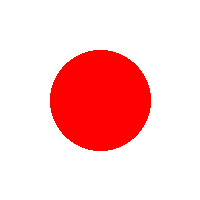

In [4]:
from PIL import Image, ImageDraw

# Create a new image with a white background
img = Image.new("RGB", (200, 200), color=(255, 255, 255))

# Draw a red circle at the center of the image
draw = ImageDraw.Draw(img)
draw.ellipse((50, 50, 150, 150), fill=(255, 0, 0))

display(img)

In computer vision, Python can be used to analyze and understand visual data. For example, the following code uses the OpenCV library to detect faces in an image:

In this code, we use the cv2.imread function to load the image, and the cv2.cvtColor function to convert it to grayscale. We then use the face_cascade object to detect faces in the image, and draw a rectangle around each face. Finally, we save the resulting image with the detected faces.

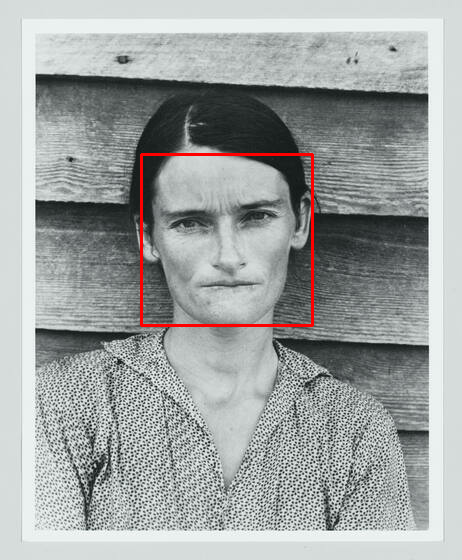

In [5]:
import cv2
from PIL import Image
# Load the image
img = cv2.imread("image/AfterWalkerEvans.jpeg")

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw a rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    
pil_image = Image.fromarray(img)
display(pil_image)

Overall, computer graphics and computer vision are two important fields within computer science that are used to generate and analyze visual data. Python is a popular programming language that is often used in these fields because of its simplicity and ease of use.

# Color System

![grayscale](data/grayscale.png)

In the computer, the brightness of the dot is represented by the integer `0` to `255`. 0 is the darkest and 255 is the brightest. The 256 values are delicate enough to surpass human vision's ability to distinguish brightness. A pixel has three values, representing the brightness of red, green, and blue light; abbreviated as RGB, the initials for red, green, and blue.

The three colors of light are superimposed to obtain various colors. **When RGB is 255, it is white light and appears white. RGB is 0, which means no light, appearing black.** If RGB is the same, it appears as gray. If the RGB is not the same, it appears in various colors.

The first picture is the example picture; the second picture is to keep the R value (G value and B value are set to 0); the third picture is to keep the G value; and the fourth picture is to keep the B value. When the corresponding pixels of the three pictures on the right are added together, the left picture is formed.

![](data/flower.png)
![](data/flowerRed.png)
![](data/flowerGreen.png)
![](data/flowerBlue.png)

```
For example
The color of a pixel in the second image (255, 0, 0)
The color of the corresponding pixel in the third image (0, 123, 0)
In the fourth picture, the color of the corresponding pixel ( 0, 0, 247)
These three pictures are added together to get the color of the corresponding pixel in the first picture
(255, 0, 0) + (0, 123, 0) + (0, 0, 247) = (255, 123, 247)

```

## Storing Data
In python (PIL library), the data of an image is stored into a two dimensional list. each of the elements contain a color as `tuple`

![](data/colorArray.png)

# Load and Save Image

This is a simple example of loading an image and invert it.

note that different image type might have different content in each pixel. For example a .png file offen contain the alpha channel, causing it having 4 elements in the list.

In [6]:
# Simple example of inverting an image

from PIL import Image
img = Image.open("image/AfterWalkerEvans.jpeg")
width, height = img.size

for y in range(height):
	for x in range(width):
		rgba = img.getpixel((x,y))
		rgba = (255 - rgba[0],  # R
				255 - rgba[1],  # G
				255 - rgba[2],  # B
				); # A
		img.putpixel((x,y), rgba)

#img.show()
img.save("output/new.png")


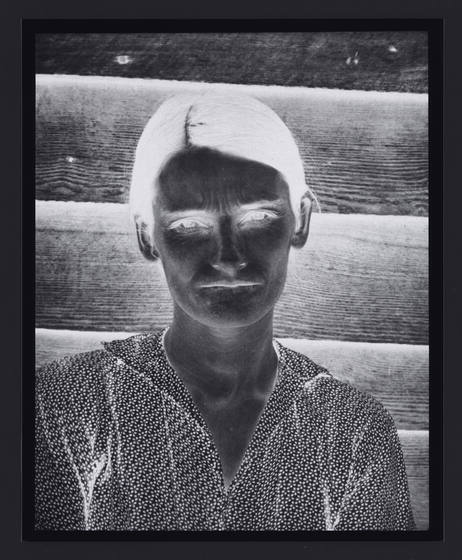

In [7]:
# we could use the method display to show image
display(img)

# Filter and Edge detection

There are different possibility for ready made filter to be applied to image, in this example we'll try to load a edge detection
``` python
 ImageFilter.BLUR
 ImageFilter.CONTOUR
 ImageFilter.DETAIL
 ImageFilter.EDGE_ENHANCE
 ImageFilter.EDGE_ENHANCE_MORE
 ImageFilter.EMBOSS
 ImageFilter.FIND_EDGES
 ImageFilter.SMOOTH
 ImageFilter.SMOOTH_MORE
 ImageFilter.SHARPEN
 ImageFilter.MaxFilter
 ImageFilter.MedianFilter
 ImageFilter.MinFilter
 ImageFilter.ModeFilter
 ImageFilter.GaussianBlur
 ImageFilter.GaussianBlur(5)
 ImageFilter.BoxBlur(5)
 ImageFilter.UnsharpMask
 ImageFilter.UnsharpMask(10)
```

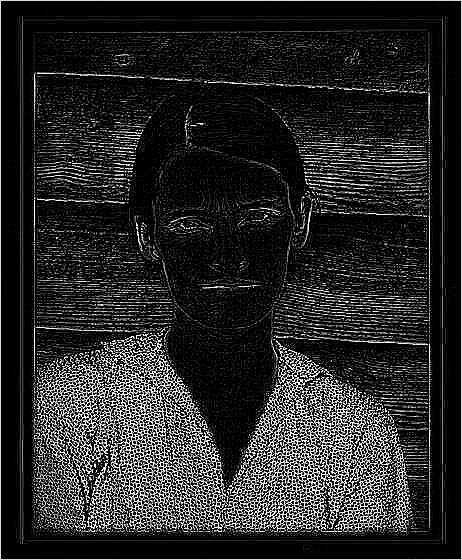

In [8]:
from PIL import Image, ImageFilter

# load image
image = Image.open("image/AfterWalkerEvans.jpeg")
 
# Convert image to grayscale, as edge detection requires input image as gray scale
image = image.convert("L")
 
image = image.filter(ImageFilter.FIND_EDGES)

display(image)

# Pixel Sorting

Introducing order in a disordered way can make for some great glitch art.
Pixel sorting is an interesting, glitchy effect which selectively orders the pixels in the rows/columns of an image. It was popularized (possibly invented) by artist Kim Asendorf (processing source code [here](https://github.com/kimasendorf/ASDFPixelSort)). 


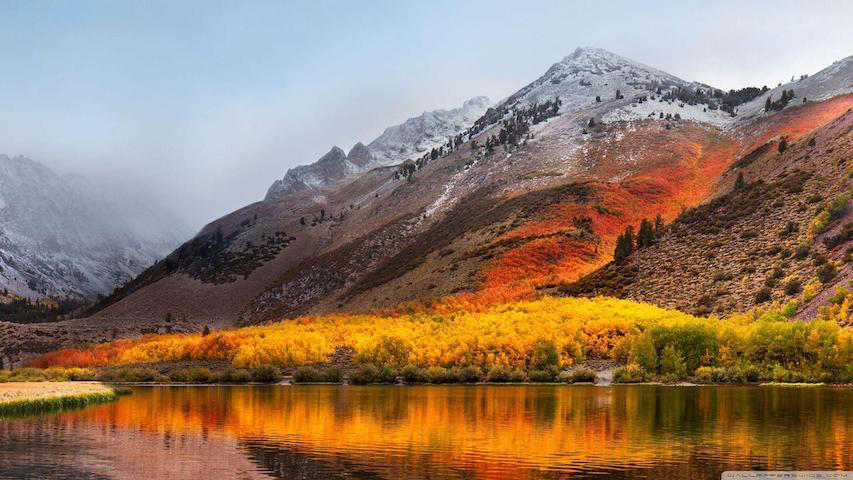

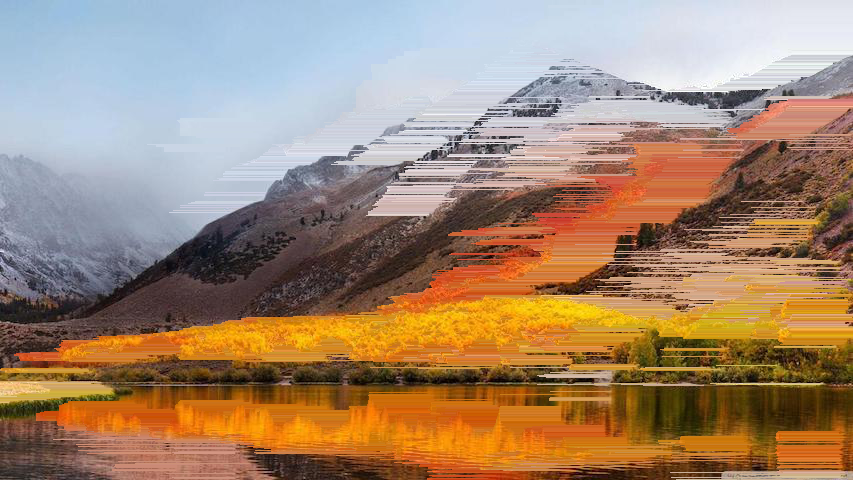

In [22]:
# Simple example of pixel sorting 

from PIL import Image,ImageDraw 
import random
img = Image.open("image/macWallPaper.jpeg")
width, height = img.size

display(img)
draw = ImageDraw.Draw(img)

for y in range(height):
    for x in range(width):
        rgb = img.getpixel((x,y))
        if rgb[0] > 200: # if color red is larger than 150, draw new pixel on left side
            draw.line((x, y)+(x-60,y), fill=rgb)

    
display(img)
#img.show()
#img.save("output/new.png")

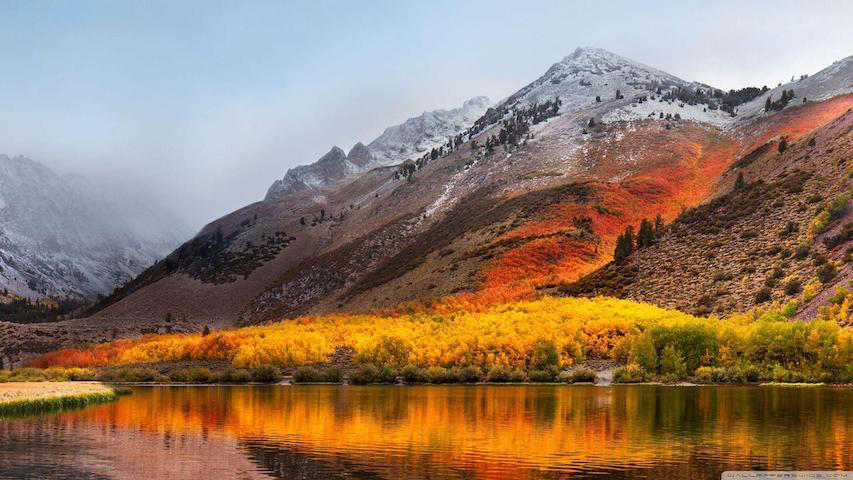

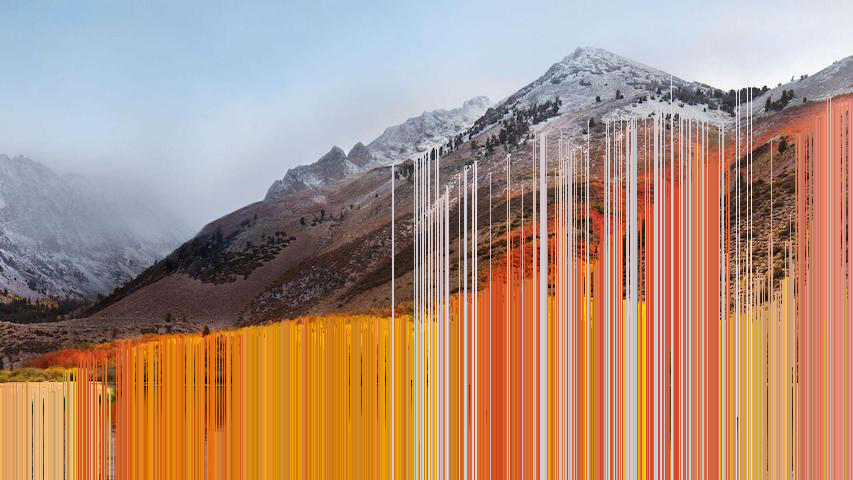

In [24]:
# Simple example of pixel sorting 
# add some randomness
from PIL import Image,ImageDraw 
import random
img = Image.open("image/macWallPaper.jpeg")
width, height = img.size

display(img)
draw = ImageDraw.Draw(img)

for y in range(height):
    for x in range(width):
        rgb = img.getpixel((x,y))
        if rgb[0] > 200 and rgb[0]< 240 and rgb[0]>rgb[1]: 
            if(random.randint(0,3)>2):
                draw.line((x, y)+(x,y+30), fill=rgb)

    
display(img)
#img.show()
#img.save("output/new.png")

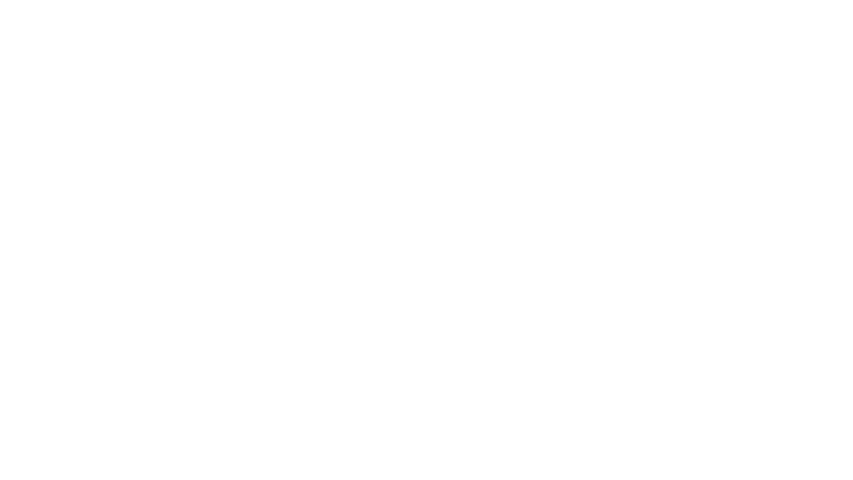

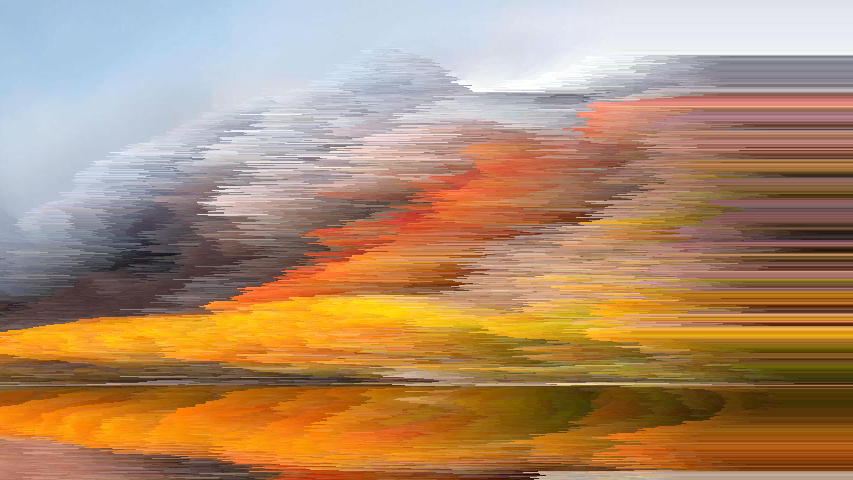

In [7]:
from PIL import Image,ImageDraw 
import random

img = Image.open("image/macWallPaper.jpeg")
width, height = img.size

# initualize a blank image with the size of image
blank = Image.new('RGB', (width, height), (255, 255, 255))

# Show a blank image
display(blank)

# draw on blank image
draw = ImageDraw.Draw(blank)
for y in range(height):
    for x in range(width):
        rgb = img.getpixel((x,y))
        draw.line((x,y)+(x-rgb[0],y), fill=rgb)
        
display(blank)
                
#img.show()
#img.save('bg.jpg')